Descriptive Statistics of the Data: 
       X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  \
count         414.0                                   414.0                            414.0   
mean           17.7                                  1083.9                              4.1   
std            11.4                                  1262.1                              2.9   
min             0.0                                    23.4                              0.0   
25%             9.0                                   289.3                              1.0   
50%            16.1                                   492.2                              4.0   
75%            28.1                                  1454.3                              6.0   
max            43.8                                  6488.0                             10.0   

       X5 latitude  X6 longitude  Y house price of unit area  
count      4.1e+02       4.1e+02   

<Figure size 640x480 with 0 Axes>

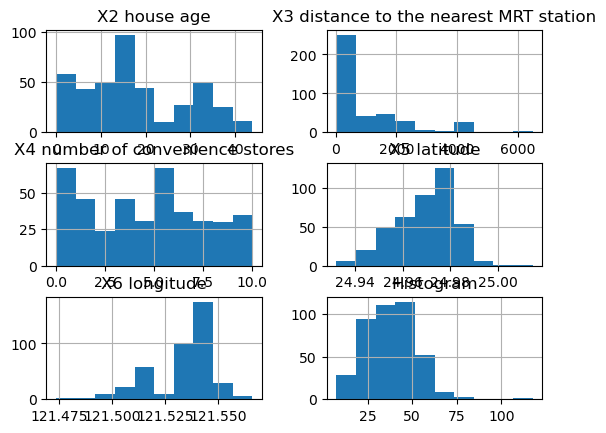

                                        X2 house age  X3 distance to the nearest MRT station  \
X2 house age                                 1.0e+00                                 2.6e-02   
X3 distance to the nearest MRT station       2.6e-02                                 1.0e+00   
X4 number of convenience stores              5.0e-02                                -6.0e-01   
X5 latitude                                  5.4e-02                                -5.9e-01   
X6 longitude                                -4.9e-02                                -8.1e-01   
Y house price of unit area                  -2.1e-01                                -6.7e-01   

                                        X4 number of convenience stores  X5 latitude  \
X2 house age                                                    5.0e-02      5.4e-02   
X3 distance to the nearest MRT station                         -6.0e-01     -5.9e-01   
X4 number of convenience stores                                

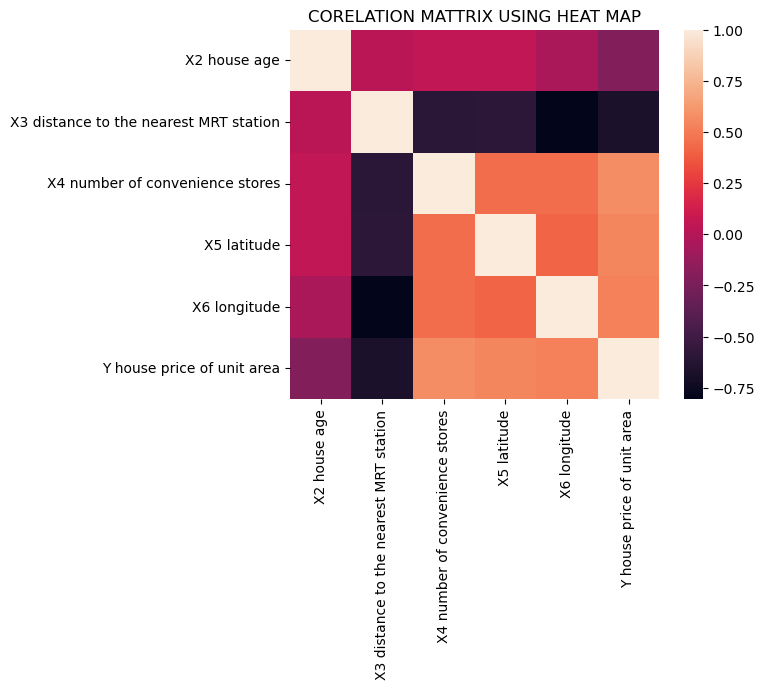

<Figure size 640x480 with 0 Axes>

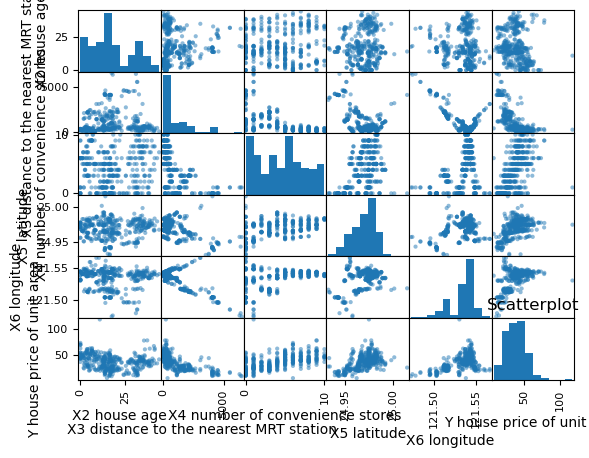

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 14 14:04:37 2023

@author: michellekim
"""

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.linear_model import LinearRegression # import Linear Regression
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

filename = 'realEstate.csv'
data = read_csv(filename)
data1 = data.drop(data.columns[0], axis=1) # drop "No" column
data2 = data1.drop(['X1 transaction date'], axis=1) # drop categorical data


names = ['X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores',	'X5 latitude',	'X6 longitude',	'Y house price of unit area']

# separate features price per square unit area is the target (y values/output)
# and the rest of the columns should be treated as inputs
array = data2.values
X_original = array[:,0:5] # features
Y_original = array[:,5]  # target

# DESCRIPTIVE STATISTICS
pd.options.display.max_columns = None
set_option('display.width', 100)
set_option('display.precision', 1)
description = data2.describe()
print("Descriptive Statistics of the Data: ")
print(description)

plt.figure() # new plot
data2.hist()
plt.title("Histogram")
plt.show()

plt.figure() # new plot
corMat = data2.corr(method='pearson')
print(corMat)
## plot correlation matrix as a heat map
sns.heatmap(corMat, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORELATION MATTRIX USING HEAT MAP")
plt.show()

plt.figure()
scatter_matrix(data2)
plt.title("Scatterplot")
plt.show()




<Figure size 640x480 with 0 Axes>

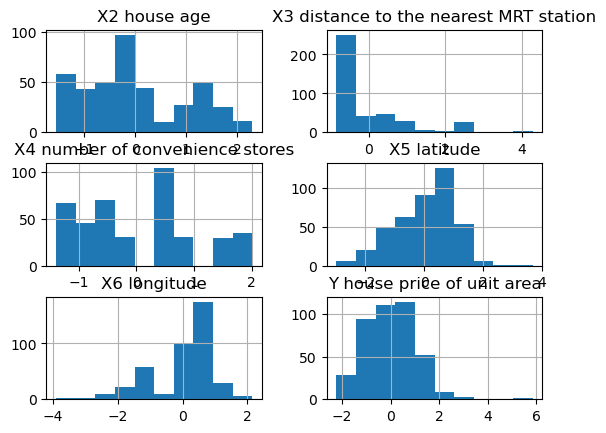

In [7]:
# normalize: data distribution is unknown or the data doesn't have Gaussian Distribution# standardize: when the data is being used for multivariate analysis i.e. when we want all the variables of comparable units. It is usually applied when the data has a bell curve

# STANDARDIZATION
scaler1 = StandardScaler().fit(data2) # create scaler object and fit data2
rescaled_data = scaler1.transform(data2) # standardize

# a new data frame with the standardized data
dataStandDf = pd.DataFrame(rescaled_data, columns = names) # new dataframe to hold standardized data


plt.figure() # new plot
dataStandDf.hist()
plt.show()

array = dataStandDf.values
X = array[:,0:5] # features
Y = array[:,5]  # target





In [8]:
# RFE

for i in range(1,6):
    NUM_FEATURES = i
    model = LinearRegression()
    rfe = RFE(estimator = model, n_features_to_select = NUM_FEATURES)
    fit = rfe.fit(X, Y) 

    print("Num Features:", fit.n_features_)
    print("Selected Features:", fit.support_)
    print("Feature Ranking:", fit.ranking_)
    # calculate the score for the selected features
    score = rfe.score(X,Y)
    print("Model Score with selected features is: ", score)
    




Num Features: 1
Selected Features: [False  True False False False]
Feature Ranking: [3 1 2 4 5]
Model Score with selected features is:  0.45375427891826703
Num Features: 2
Selected Features: [False  True  True False False]
Feature Ranking: [2 1 1 3 4]
Model Score with selected features is:  0.49656835105076835
Num Features: 3
Selected Features: [ True  True  True False False]
Feature Ranking: [1 1 1 2 3]
Model Score with selected features is:  0.5410632980005723
Num Features: 4
Selected Features: [ True  True  True  True False]
Feature Ranking: [1 1 1 1 2]
Model Score with selected features is:  0.5711351969713696
Num Features: 5
Selected Features: [ True  True  True  True  True]
Feature Ranking: [1 1 1 1 1]
Model Score with selected features is:  0.5711617064827441


In [9]:
# Build a regularized version of the regression model (use both Lasso and Ridge methods) 
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3,random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

linear regression train score: 0.5563145979243255
linear regression test score: 0.6038048023415713
ridge regression train score low alpha: 0.5563145970530934
ridge regression test score low alpha: 0.6038089813453422
ridge regression train score high alpha: 0.5379363261069321
ridge regression test score high alpha: 0.5984294805725647


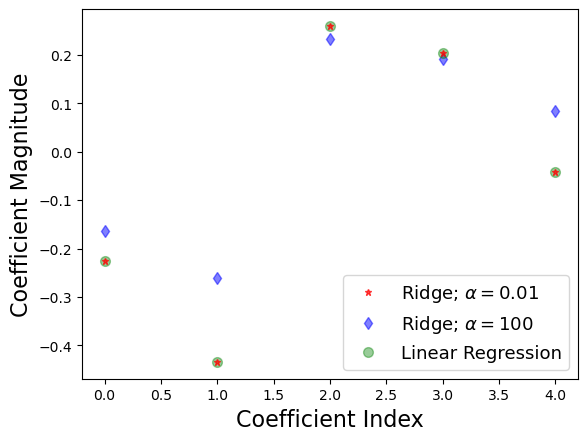

training score: 0.0
test score:  -0.000634330627290014
number of features used:  0
training score for alpha=0.5: 0.0
test score for alpha =0.5:  -0.000634330627290014
number of features used: for alpha =0.5: 0
training score for alpha=0.01: 0.5554509831034635
test score for alpha =0.01:  0.6066758613370471
number of features used: for alpha =0.01: 4
training score for alpha=0.0001: 0.5563145031313953
test score for alpha =0.0001:  0.6038441485928245
number of features used: for alpha =0.0001: 5
LR training score: 0.5563145979243255
LR test score:  0.6038048023415713


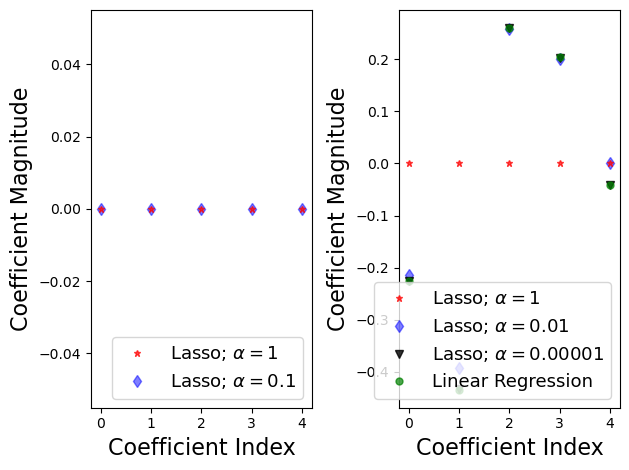

In [10]:


rr = Ridge(alpha=0.01) # higher the alpha value, alpha = lambda, more restriction on the coefficients; low alpha > closer to the unconstraint case (original MLR)

# linear and ridge regression 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha/lambda value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print( "ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso05 = Lasso(alpha=10, max_iter=1000000)
lasso05.fit(X_train,y_train)
train_score05=lasso05.score(X_train,y_train)
test_score05=lasso05.score(X_test,y_test)
coeff_used05 = np.sum(lasso05.coef_!=0)
print( "training score for alpha=0.5:", train_score05 )
print( "test score for alpha =0.5: ", test_score05)
print( "number of features used: for alpha =0.5:", coeff_used05)

lasso001 = Lasso(alpha=0.01, max_iter=1000000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print( "training score for alpha=0.01:", train_score001 )
print( "test score for alpha =0.01: ", test_score001)
print( "number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=1000000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "training score for alpha=0.0001:", train_score00001 )
print( "test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print( "LR training score:", lr_train_score )
print( "LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso05.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.1$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


In [11]:

# set up models for cross validation
NUM_FEATURES = 1
model = LinearRegression()
rfe_1 = RFE(estimator = model, n_features_to_select = NUM_FEATURES)


NUM_FEATURES = 2
rfe_2 = RFE(estimator = model, n_features_to_select = NUM_FEATURES)
fit_2 = rfe_2.fit(X, Y) 
    
NUM_FEATURES = 3
rfe_3 = RFE(estimator = model, n_features_to_select = NUM_FEATURES)

NUM_FEATURES = 4
rfe_4 = RFE(estimator = model, n_features_to_select = NUM_FEATURES)

NUM_FEATURES = 5
rfe_5 = RFE(estimator = model, n_features_to_select = NUM_FEATURES)


rfe1: 0.457374 (0.111615)
rfe2: 0.500645 (0.141776)
rfe3: 0.526938 (0.124293)
rfe4: 0.577923 (0.119377)
rfe5: 0.575891 (0.119586)


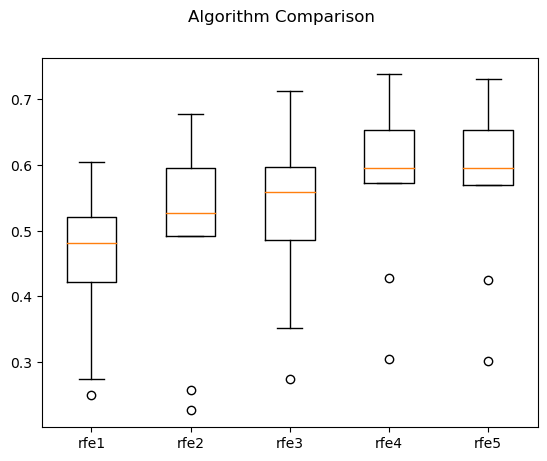

In [12]:

# prepare models
models = []

models.append(('rfe1', rfe_1))#, RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('rfe2', rfe_2))#, RandomForestClassifier(max_depth=3, random_state=0)))
models.append(('rfe3', rfe_3))
models.append(('rfe4', rfe_4))
models.append(('rfe5', rfe_5))

results = []
names = []
for name, mod in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(mod, X, Y, cv=kfold, scoring = 'r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()